In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')
sns.set(style="whitegrid", palette="colorblind", color_codes=True)


# Problem 8

In [2]:
# read data and make first column the index
college_df = pd.read_csv("../data/College.csv", index_col=0)

In [3]:
# view first couple columns
college_df.head()

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

In [4]:
# summary statistics
college_df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

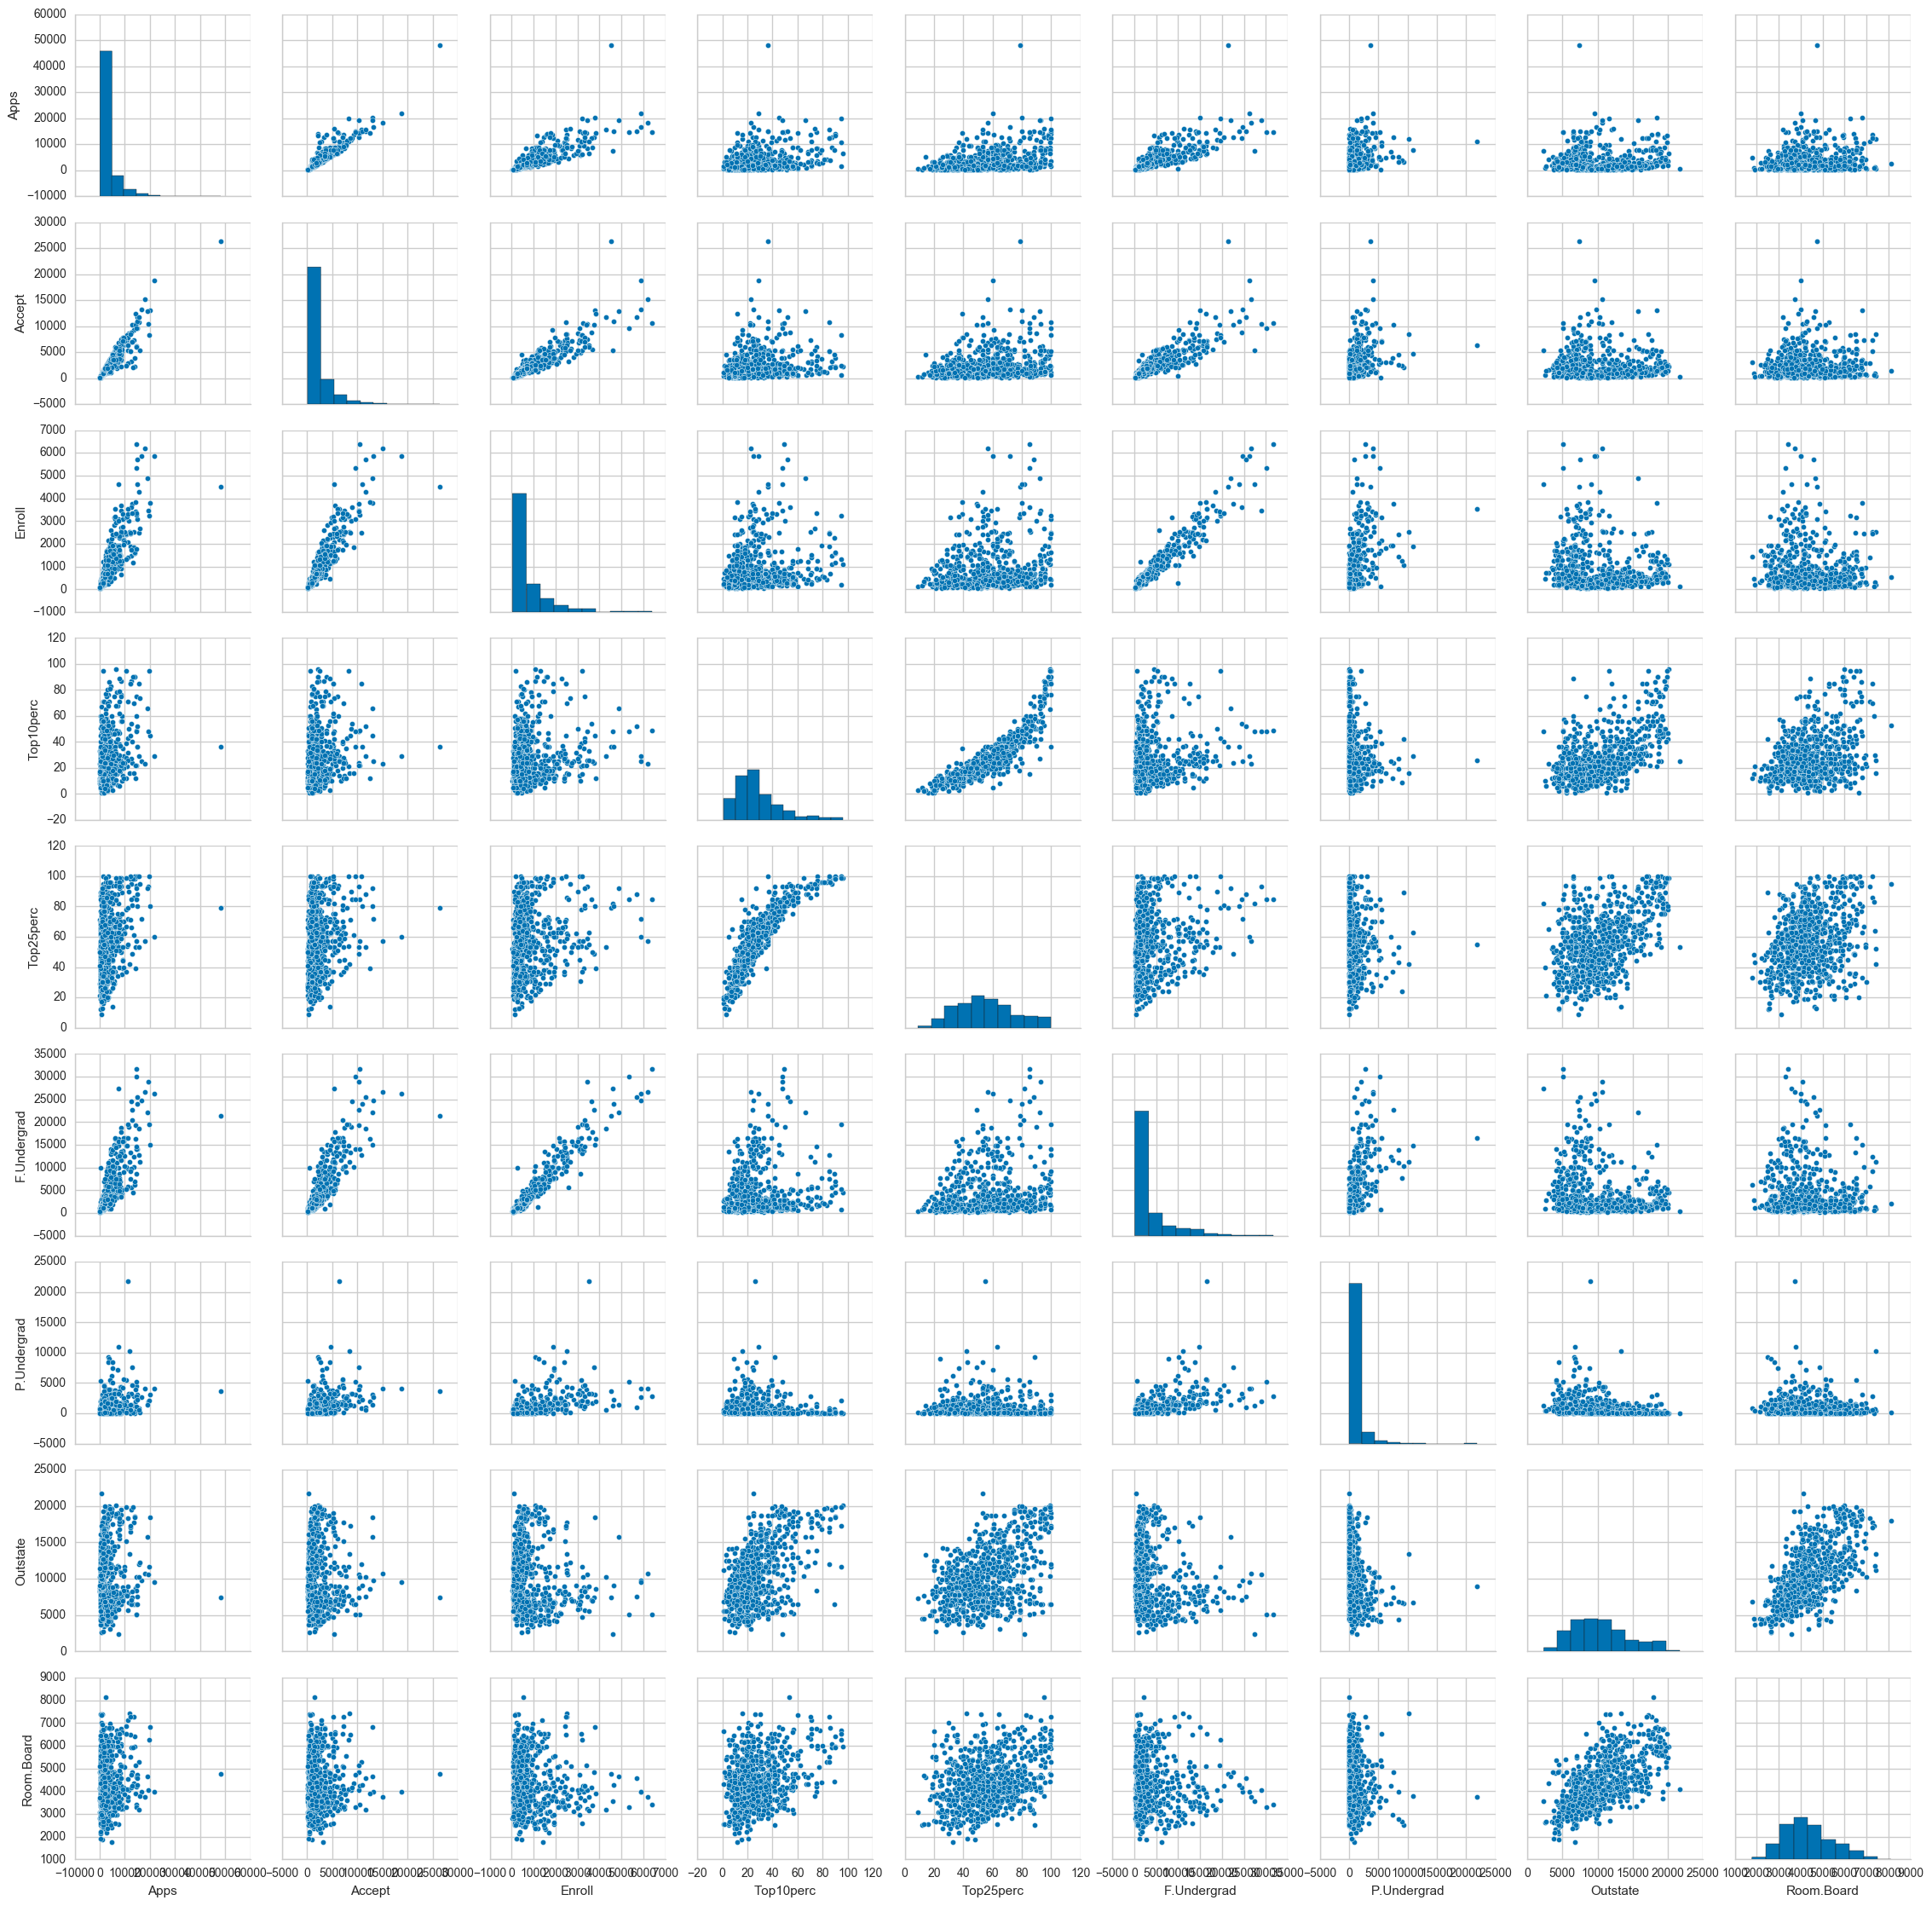

In [5]:
# ii.

# pairplot the first 10 columns
sns.pairplot(college_df.iloc[:,0:10])

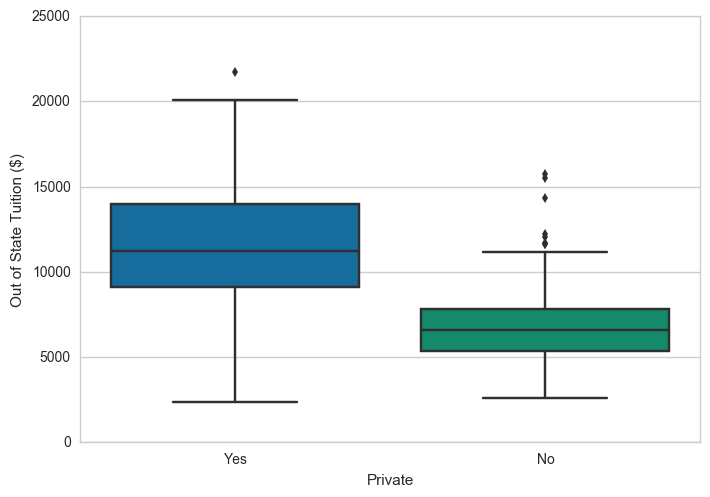

In [6]:
# iii.
# box plot of private and public out of state tuition
sns.boxplot(college_df['Private'],college_df['Outstate'])
plt.ylabel("Out of State Tuition ($)")

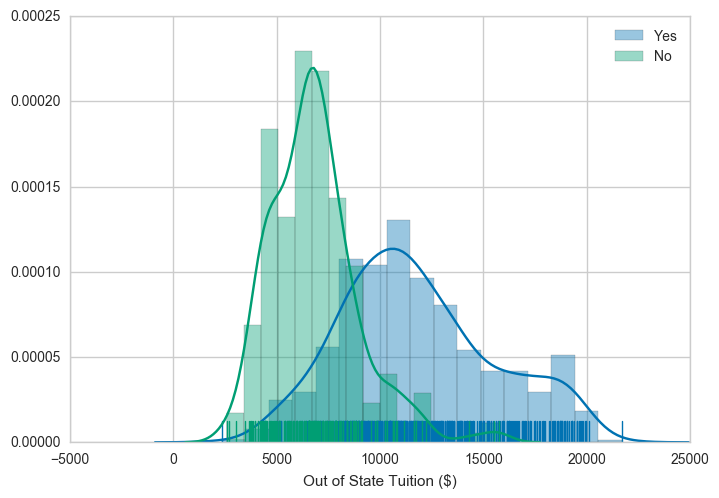

In [7]:
# bonus distribution plots
sns.distplot(college_df.loc[college_df["Private"]=="Yes"]["Outstate"], rug=True,label = "Yes")
sns.distplot(college_df.loc[college_df["Private"]=="No"]["Outstate"], rug=True,label= "No")
plt.legend()
plt.xlabel("Out of State Tuition ($)")

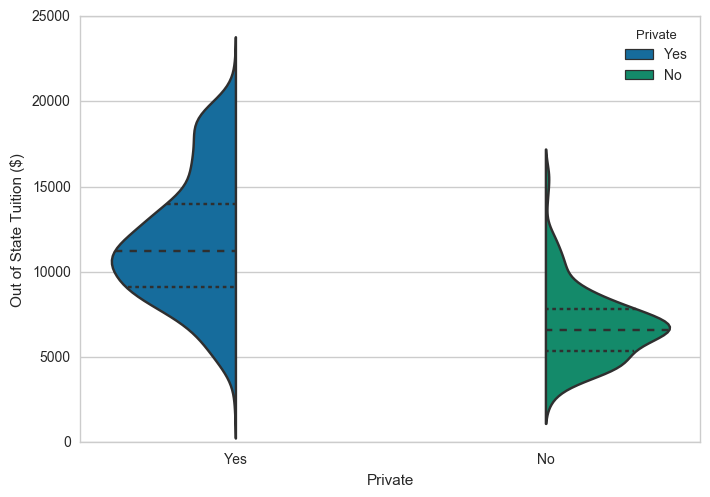

In [8]:
# bonus: violin plot to see the quartiles, outliers and distribution
sns.violinplot(y = 'Outstate', x = "Private", hue = 'Private', data = college_df, split=True,inner="quart")
plt.ylabel("Out of State Tuition ($)")

In [9]:
# iv.
elite = lambda x: "Yes" if x>50 else "No"
college_df["Elite"] = college_df["Top10perc"].apply(elite)

In [10]:
college_df["Elite"].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

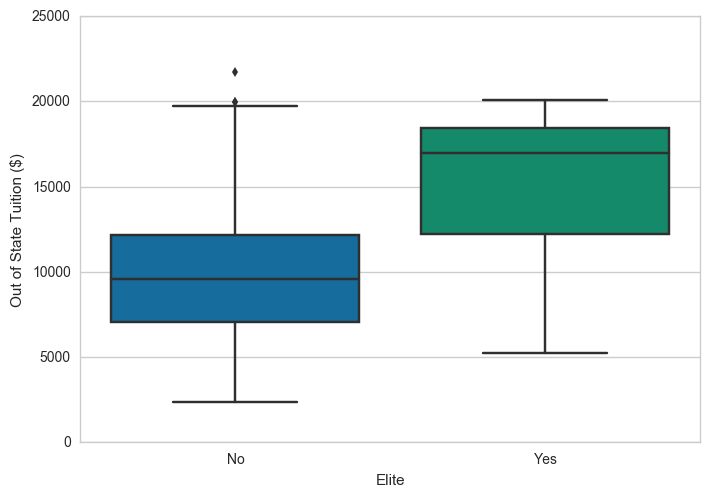

In [11]:
# box plot of private and public out of state tuition
sns.boxplot(college_df['Elite'],college_df['Outstate'])
plt.ylabel("Out of State Tuition ($)")

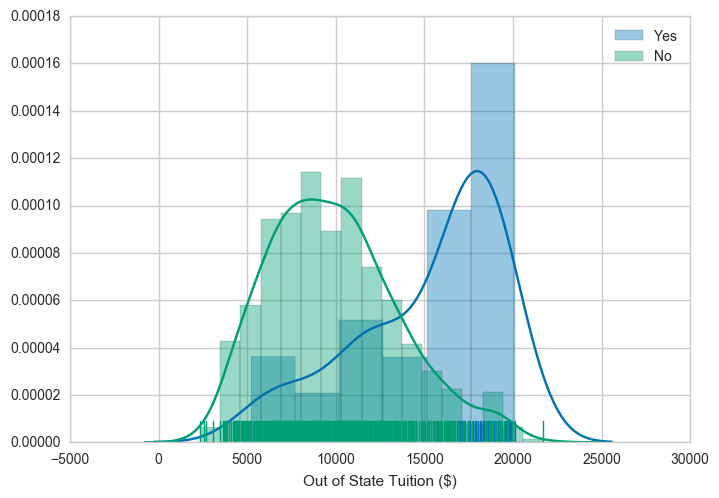

In [12]:
# bonus distribution plots
sns.distplot(college_df.loc[college_df["Elite"]=="Yes"]["Outstate"], rug=True,label = "Yes")
sns.distplot(college_df.loc[college_df["Elite"]=="No"]["Outstate"], rug=True,label= "No")
plt.legend()
plt.xlabel("Out of State Tuition ($)")

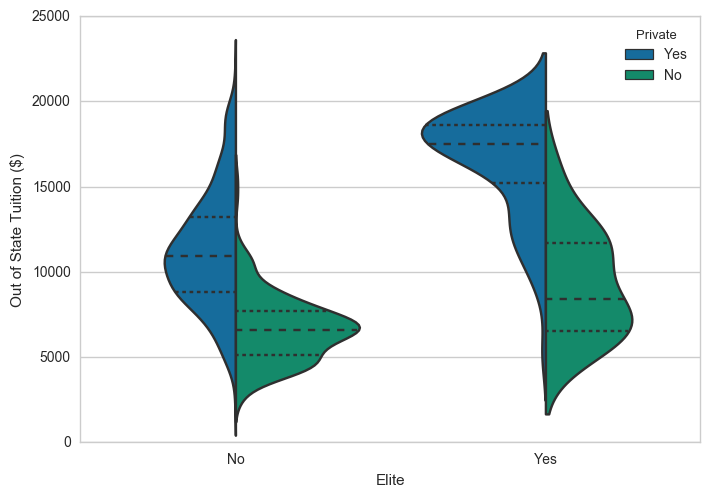

In [13]:
# bonus: violin plot to see the quartiles, outliers and distribution
sns.violinplot(y = 'Outstate', x = "Elite", hue = 'Private', data = college_df, split=True,inner="quart")
plt.ylabel("Out of State Tuition ($)")

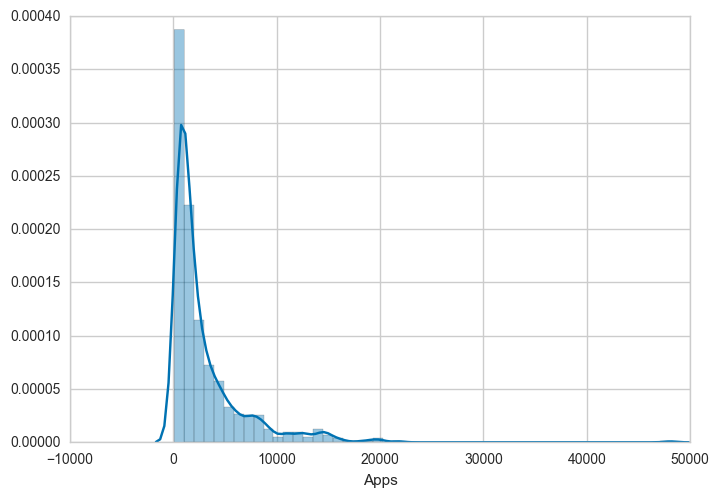

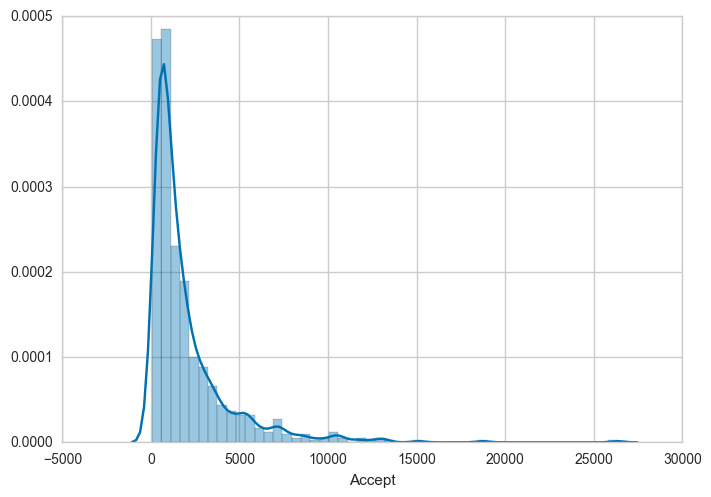

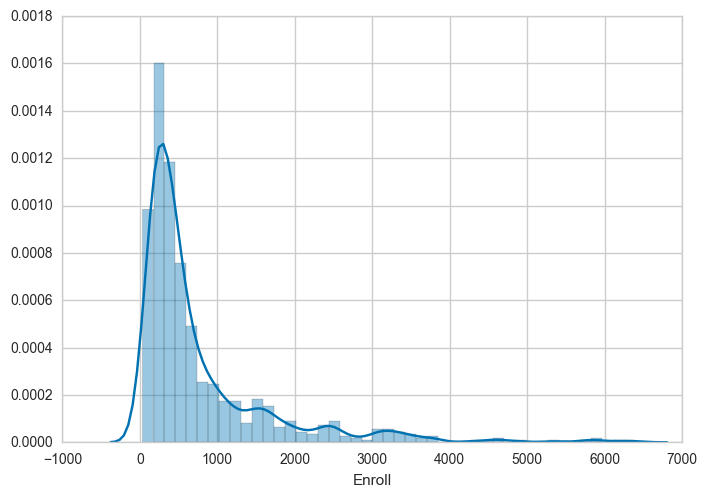

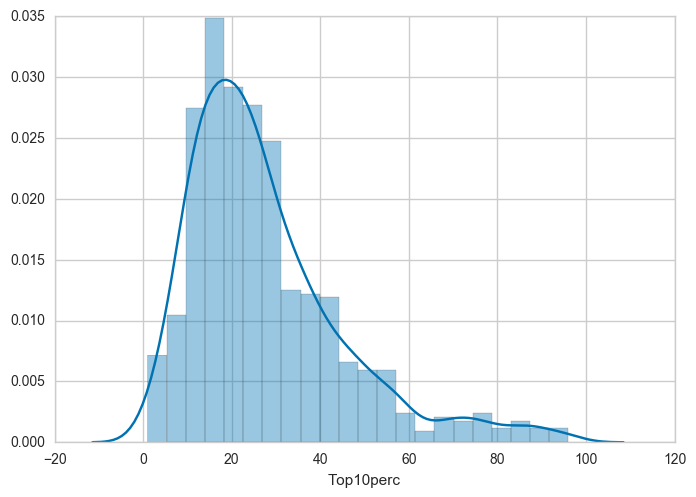

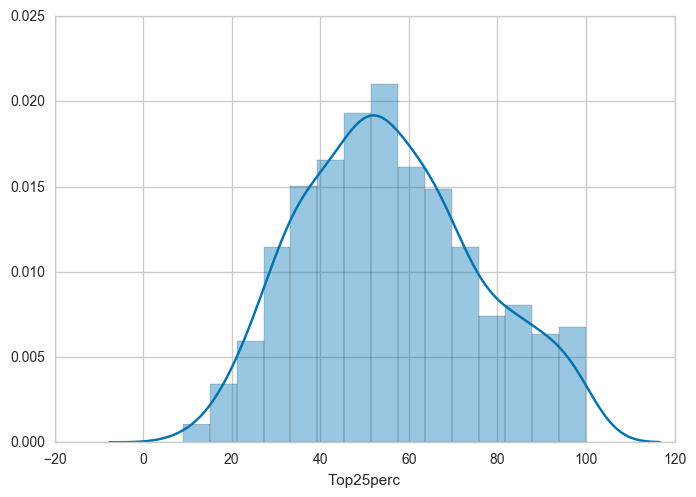

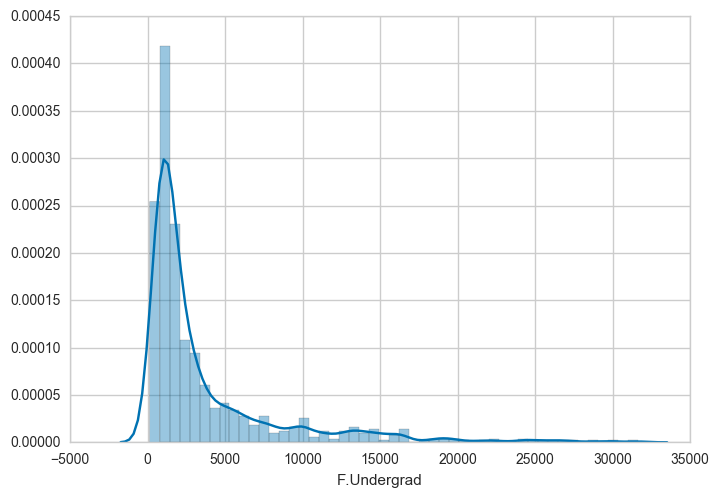

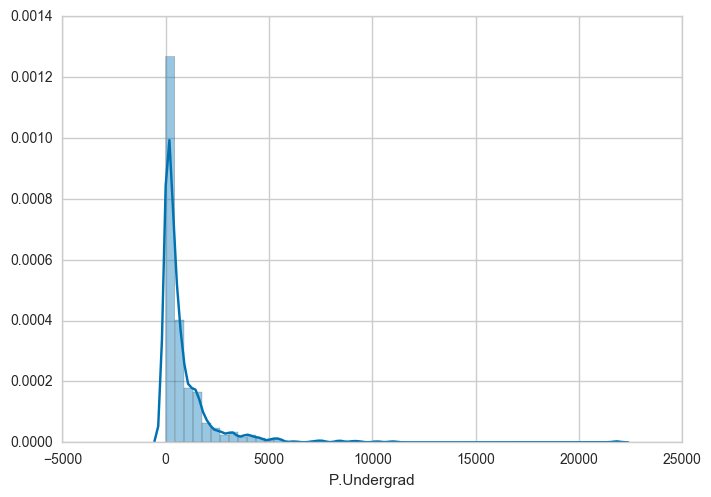

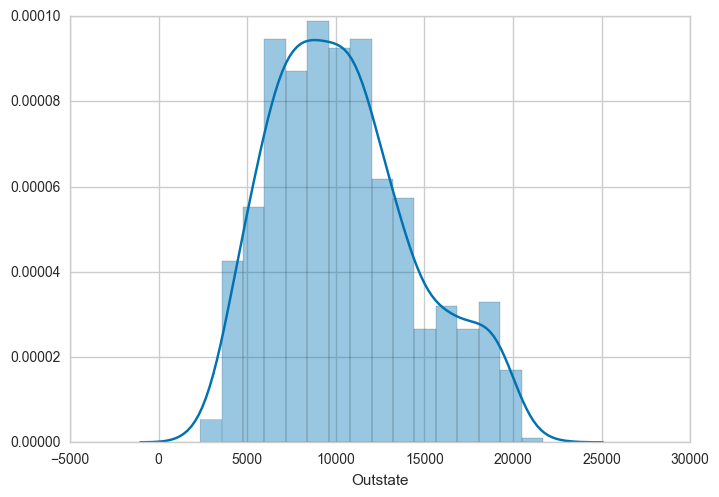

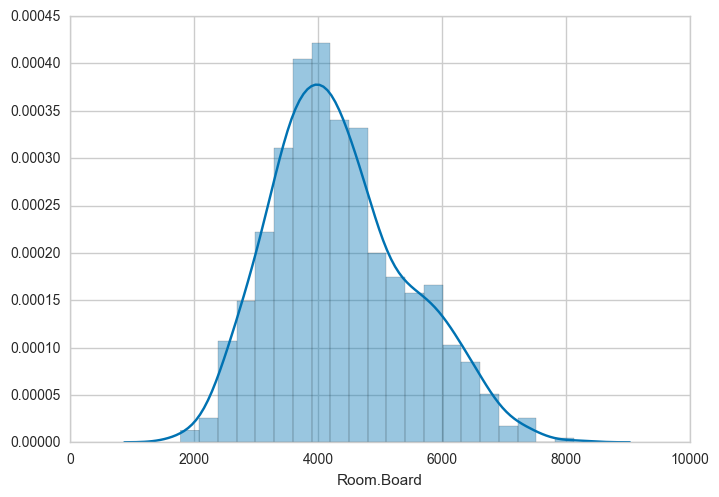

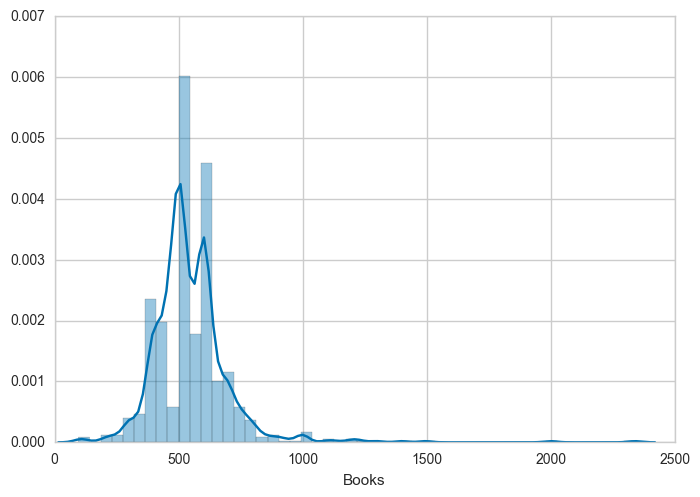

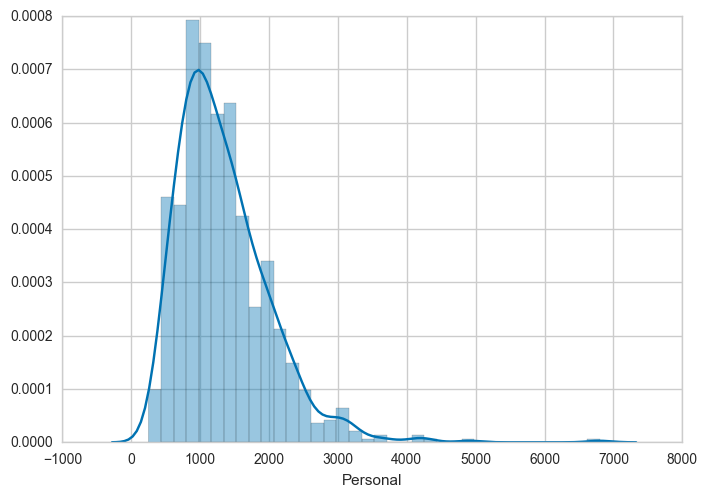

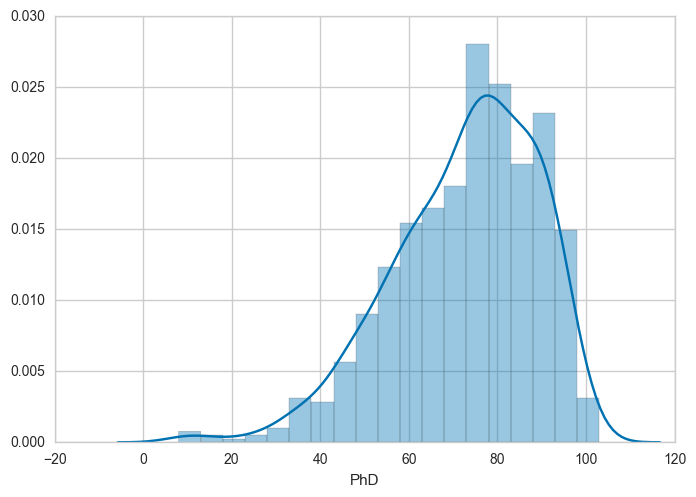

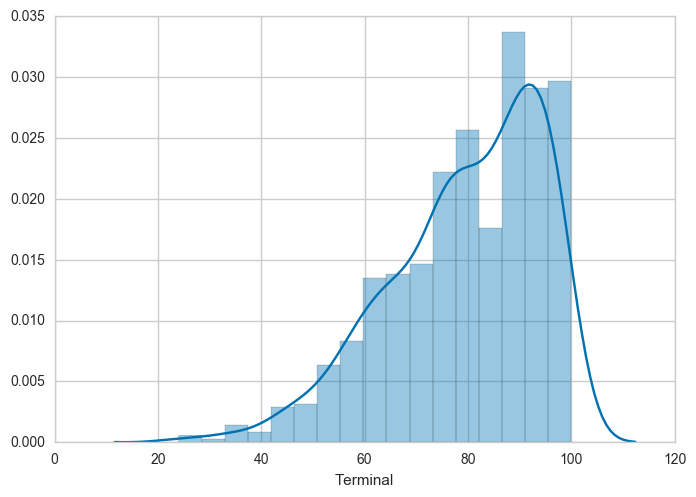

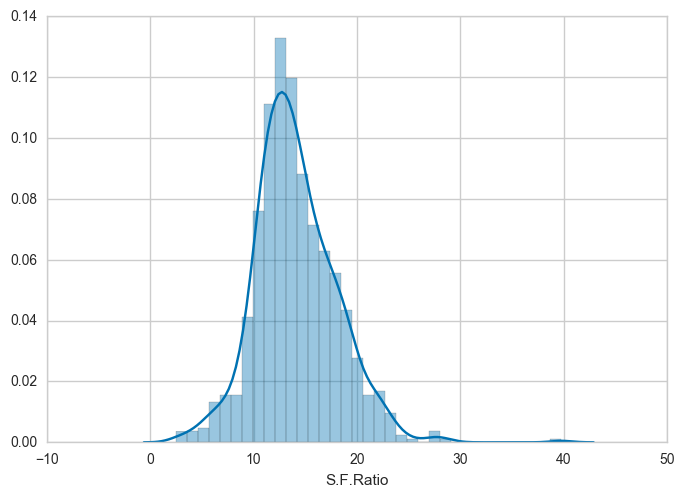

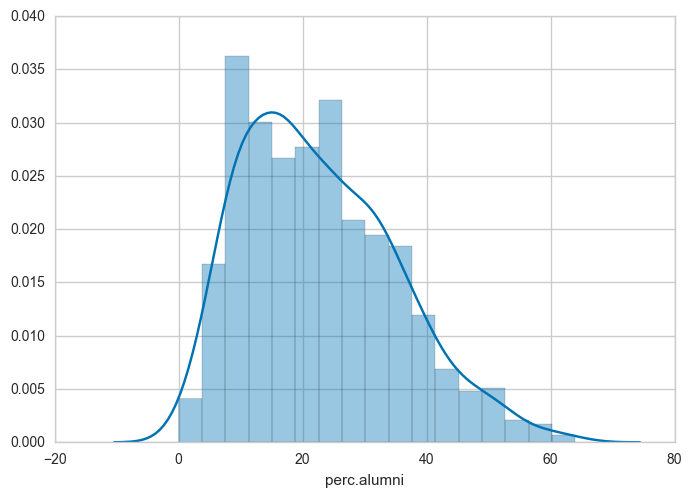

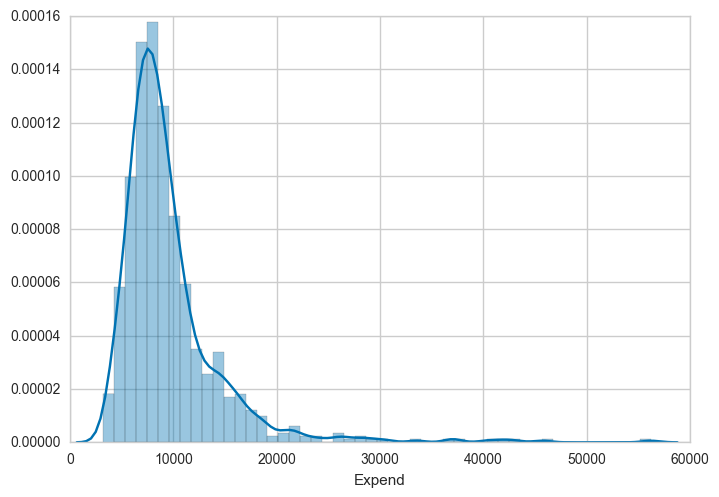

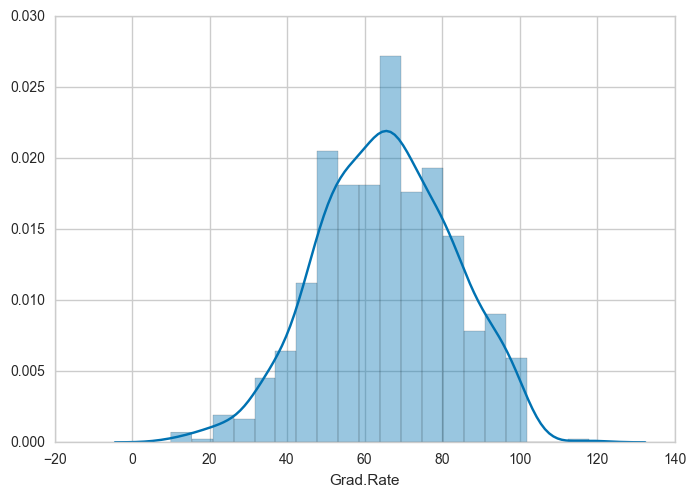

In [14]:
#v.

for feature in college_df.columns:
    #if numeric features (int64, float64 etc.)
    if "object" != college_df[feature].dtype:
        sns.distplot(college_df[feature])
        plt.show()

# Lab and Question 9

In [15]:
auto_df = pd.read_csv("../data/Auto.csv")

#turn car name into index
auto_df.index = auto_df["name"]
del auto_df["name"]

In [16]:
#replace ? by nan in horse power
auto_df = auto_df.replace('?', np.nan)
#remove nans
auto_df = auto_df.dropna()


In [17]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object

In [18]:
#turn horse power into 
auto_df["horsepower"] = auto_df["horsepower"].astype(int)

In [19]:
auto_df.shape

(392, 8)

In [20]:
auto_df.columns

Index([u'mpg', u'cylinders', u'displacement', u'horsepower', u'weight',
       u'acceleration', u'year', u'origin'],
      dtype='object')

In [21]:
auto_df.head()

mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0         130    3504   
buick skylark 320          15.0          8         350.0         165    3693   
plymouth satellite         18.0          8         318.0         150    3436   
amc rebel sst              16.0          8         304.0         150    3433   
ford torino                17.0          8         302.0         140    3449   

                           acceleration  year  origin  
name                                                   
chevrolet chevelle malibu          12.0    70       1  
buick skylark 320                  11.5    70       1  
plymouth satellite                 11.0    70       1  
amc rebel sst                      12.0    70       1  
ford torino                        10.5    70       1

In [22]:
# (a)
# quantitative: mpg, cylinders, displacement, horsepower, weight,
# acceleration, year
# qualitative: name, origin

In [23]:
# (b) (c)
auto_df.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

In [24]:
# (d)
selection = auto_df[0:9].append(auto_df[85:]) 
selection.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  316.000000  316.000000    316.000000  316.000000   316.000000   
mean    24.404430    5.373418    187.240506  100.721519  2935.971519   
std      7.867283    1.654179     99.678367   35.708853   811.300208   
min     11.000000    3.000000     68.000000   46.000000  1649.000000   
25%     18.000000    4.000000    100.250000   75.000000  2213.750000   
50%     23.950000    4.000000    145.500000   90.000000  2792.500000   
75%     30.550000    6.000000    250.000000  115.000000  3508.000000   
max     46.600000    8.000000    455.000000  230.000000  4997.000000   

       acceleration        year      origin  
count    316.000000  316.000000  316.000000  
mean      15.726899   77.145570    1.601266  
std        2.693721    3.106217    0.819910  
min        8.500000   70.000000    1.000000  
25%       14.000000   75.000000    1.000000  
50%       15.500000   77.000000    1.000000  
75%       17.300000   80.000000    2.000000  
max       24.800000   82.000000    3.000000

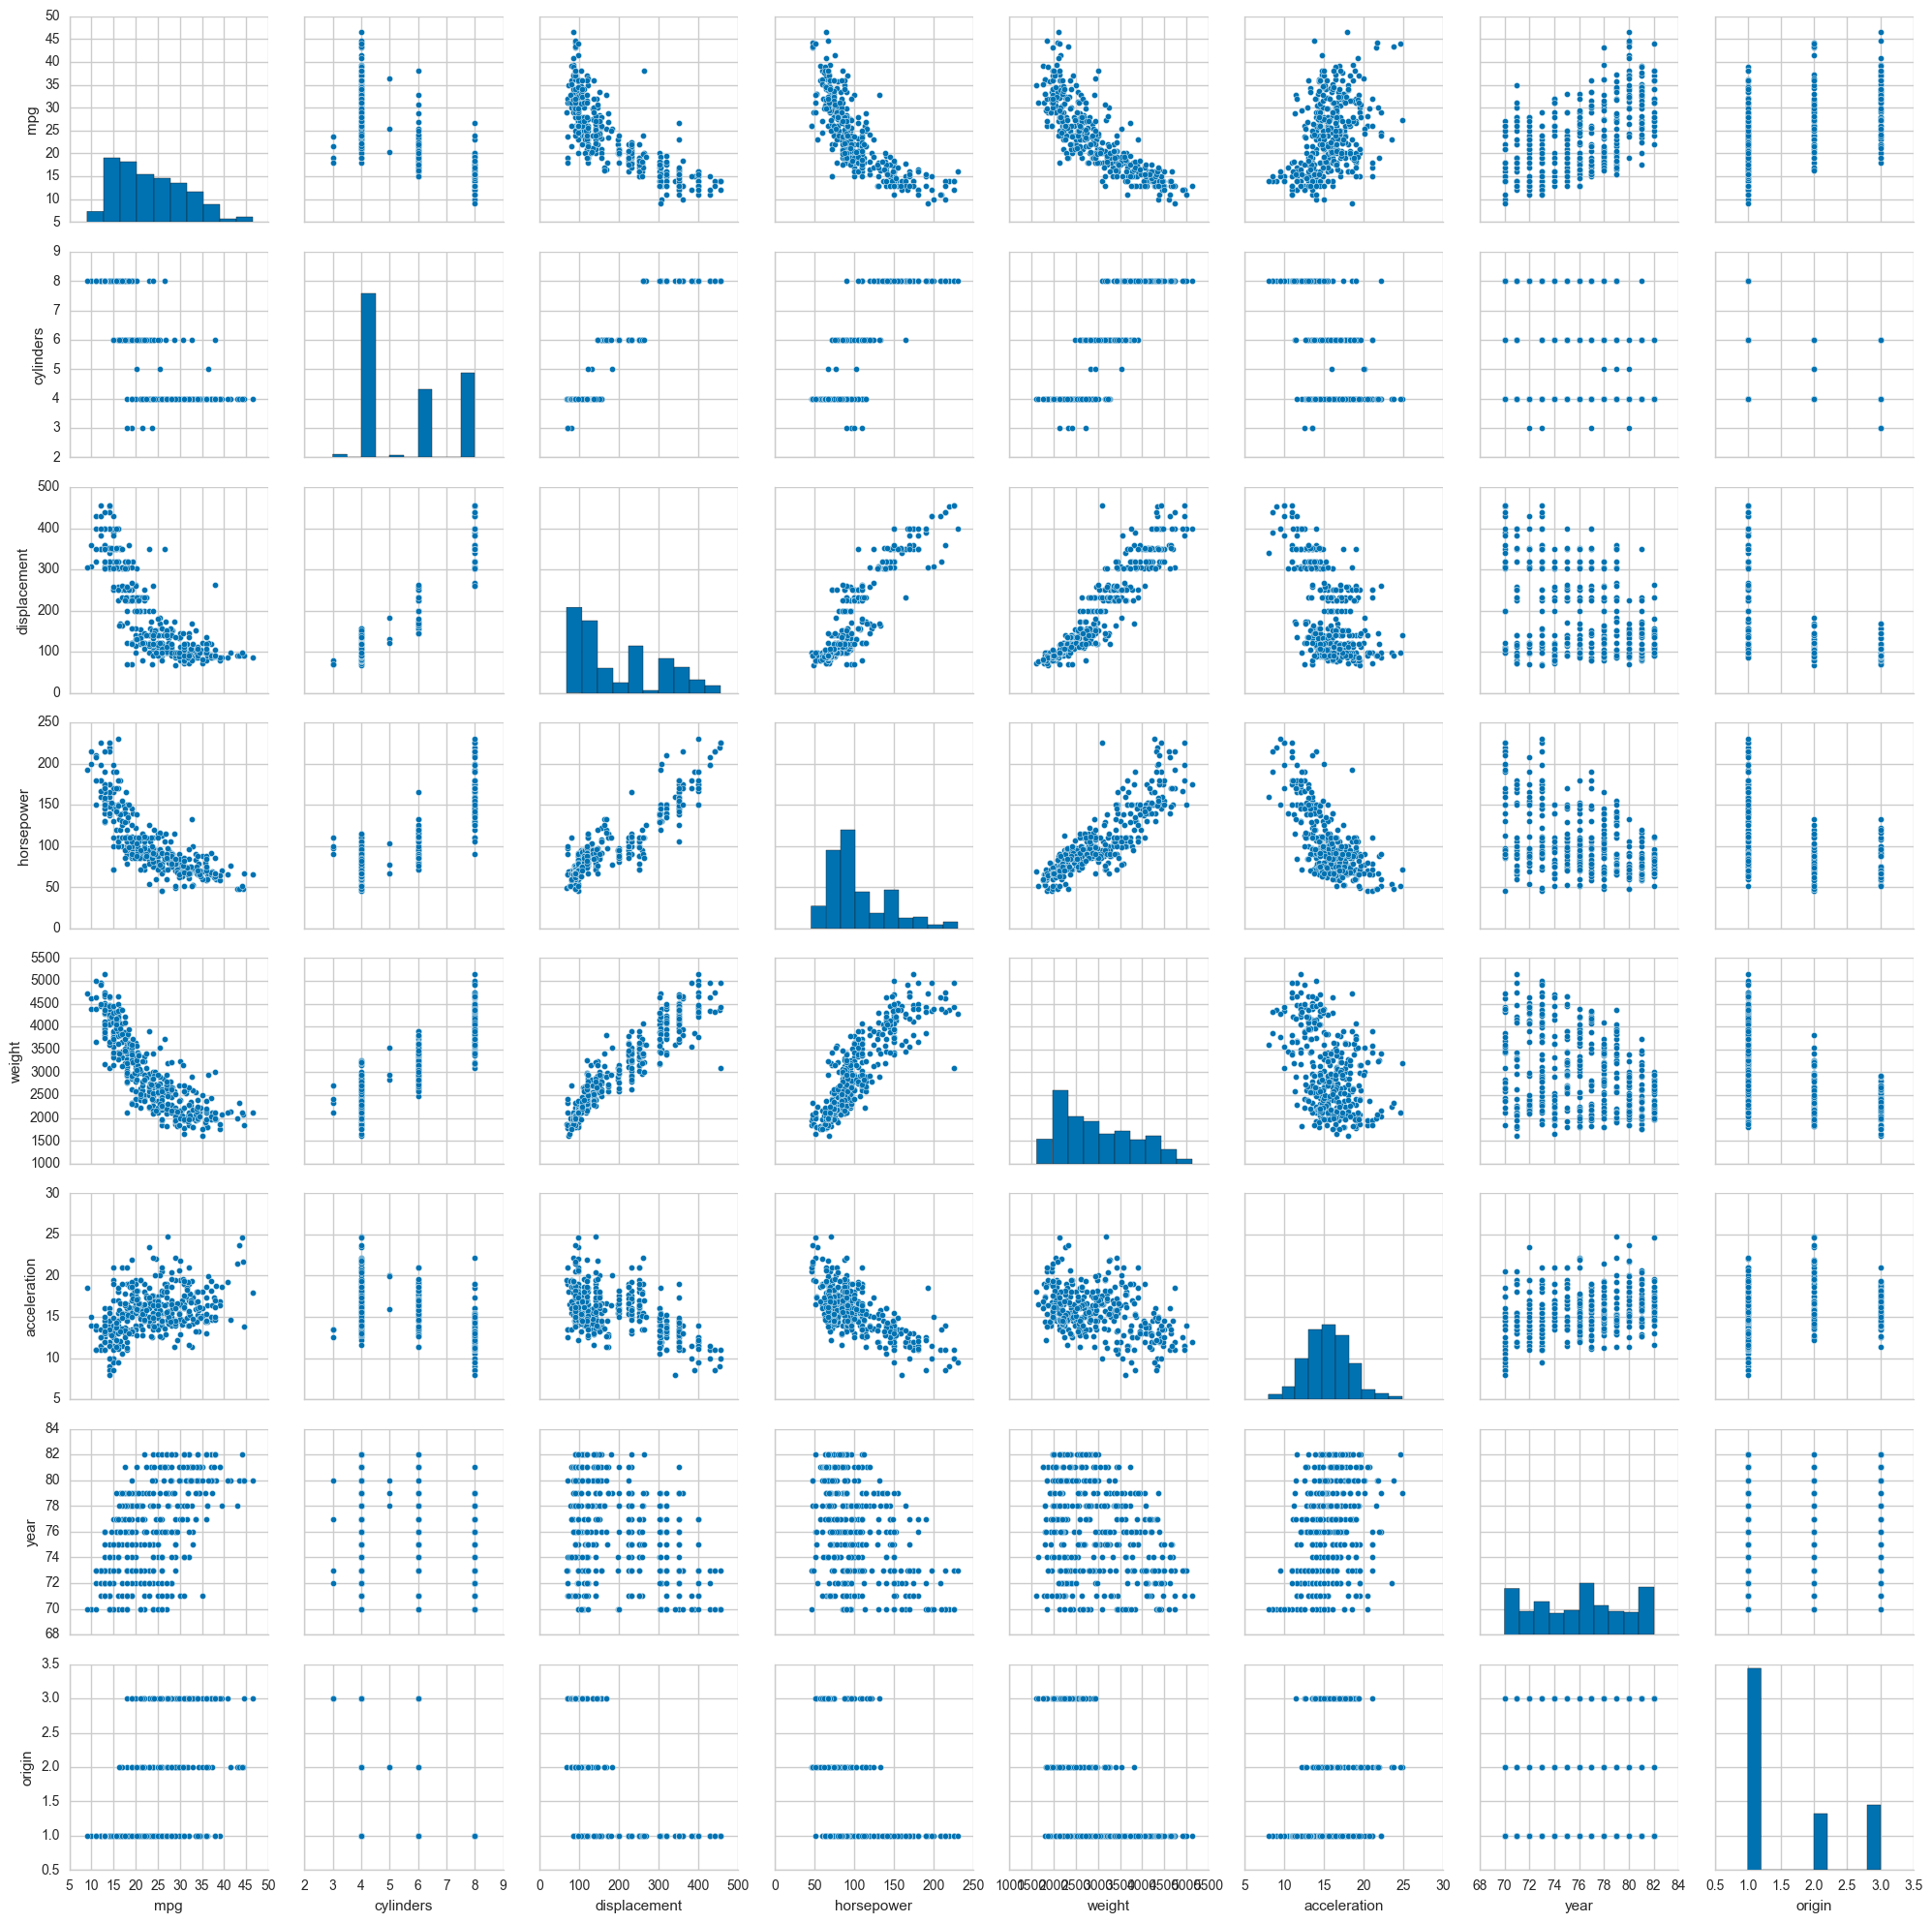

In [25]:
# (e)
sns.pairplot(auto_df)

In [26]:
# (f)
# All of the predictors show some correlation with mpg (first column). The name predictor has 
# too little observations per name though, so it was omitted

# Question 10

In [27]:
# note Boston.csv was added to the /data folder
boston_df = pd.read_csv("../data/Boston.csv")

### Using the R python interface

One could use the rpy2 / R python interface (http://pandas.pydata.org/pandas-docs/stable/r_interface.html)

This must be installed using:
`pip install rpy2` in terminal


In [28]:
import pandas.rpy.common as com

#import MASS library
infert = com.importr("MASS")

#load data
boston_df = com.load_data('Boston')

/Users/aandrade/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html
  if __name__ == '__main__':


In [29]:
boston_df.shape
# 14 features, 506 housing values in Boston suburbs


(506, 14)

In [30]:
boston_df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [31]:
import rpy2.robjects.help as rh

# load the documentation
base_help = rh.Package('MASS')
hp = base_help.fetch('Boston')
hp.sections.keys()

('title',
 'name',
 'alias',
 'keyword',
 'description',
 'usage',
 'format',
 'source')

In [32]:
# print the data description
print(''.join(hp.to_docstring(('format',))))

format
------


   This data frame contains the following columns:
    
      crim 
       per capita crime rate by town.
      
      zn 
       proportion of residential land zoned for lots over 25,000 sq.ft.
      
      indus 
       proportion of non-retail business acres per town.
      
      chas 
       Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
      
      nox 
       nitrogen oxides concentration (parts per 10 million).
      
      rm 
       average number of rooms per dwelling.
      
      age 
       proportion of owner-occupied units built prior to 1940.
      
      dis 
       weighted mean of distances to five Boston employment centres.
      
      rad 
       index of accessibility to radial highways.
      
      tax 
       full-value property-tax rate per \$10,000.
      
      ptratio 
       pupil-teacher ratio by town.
      
      black 
        1000(Bk - 0.63)^2  where  Bk  is the proportion of blacks
       by town.
      
   

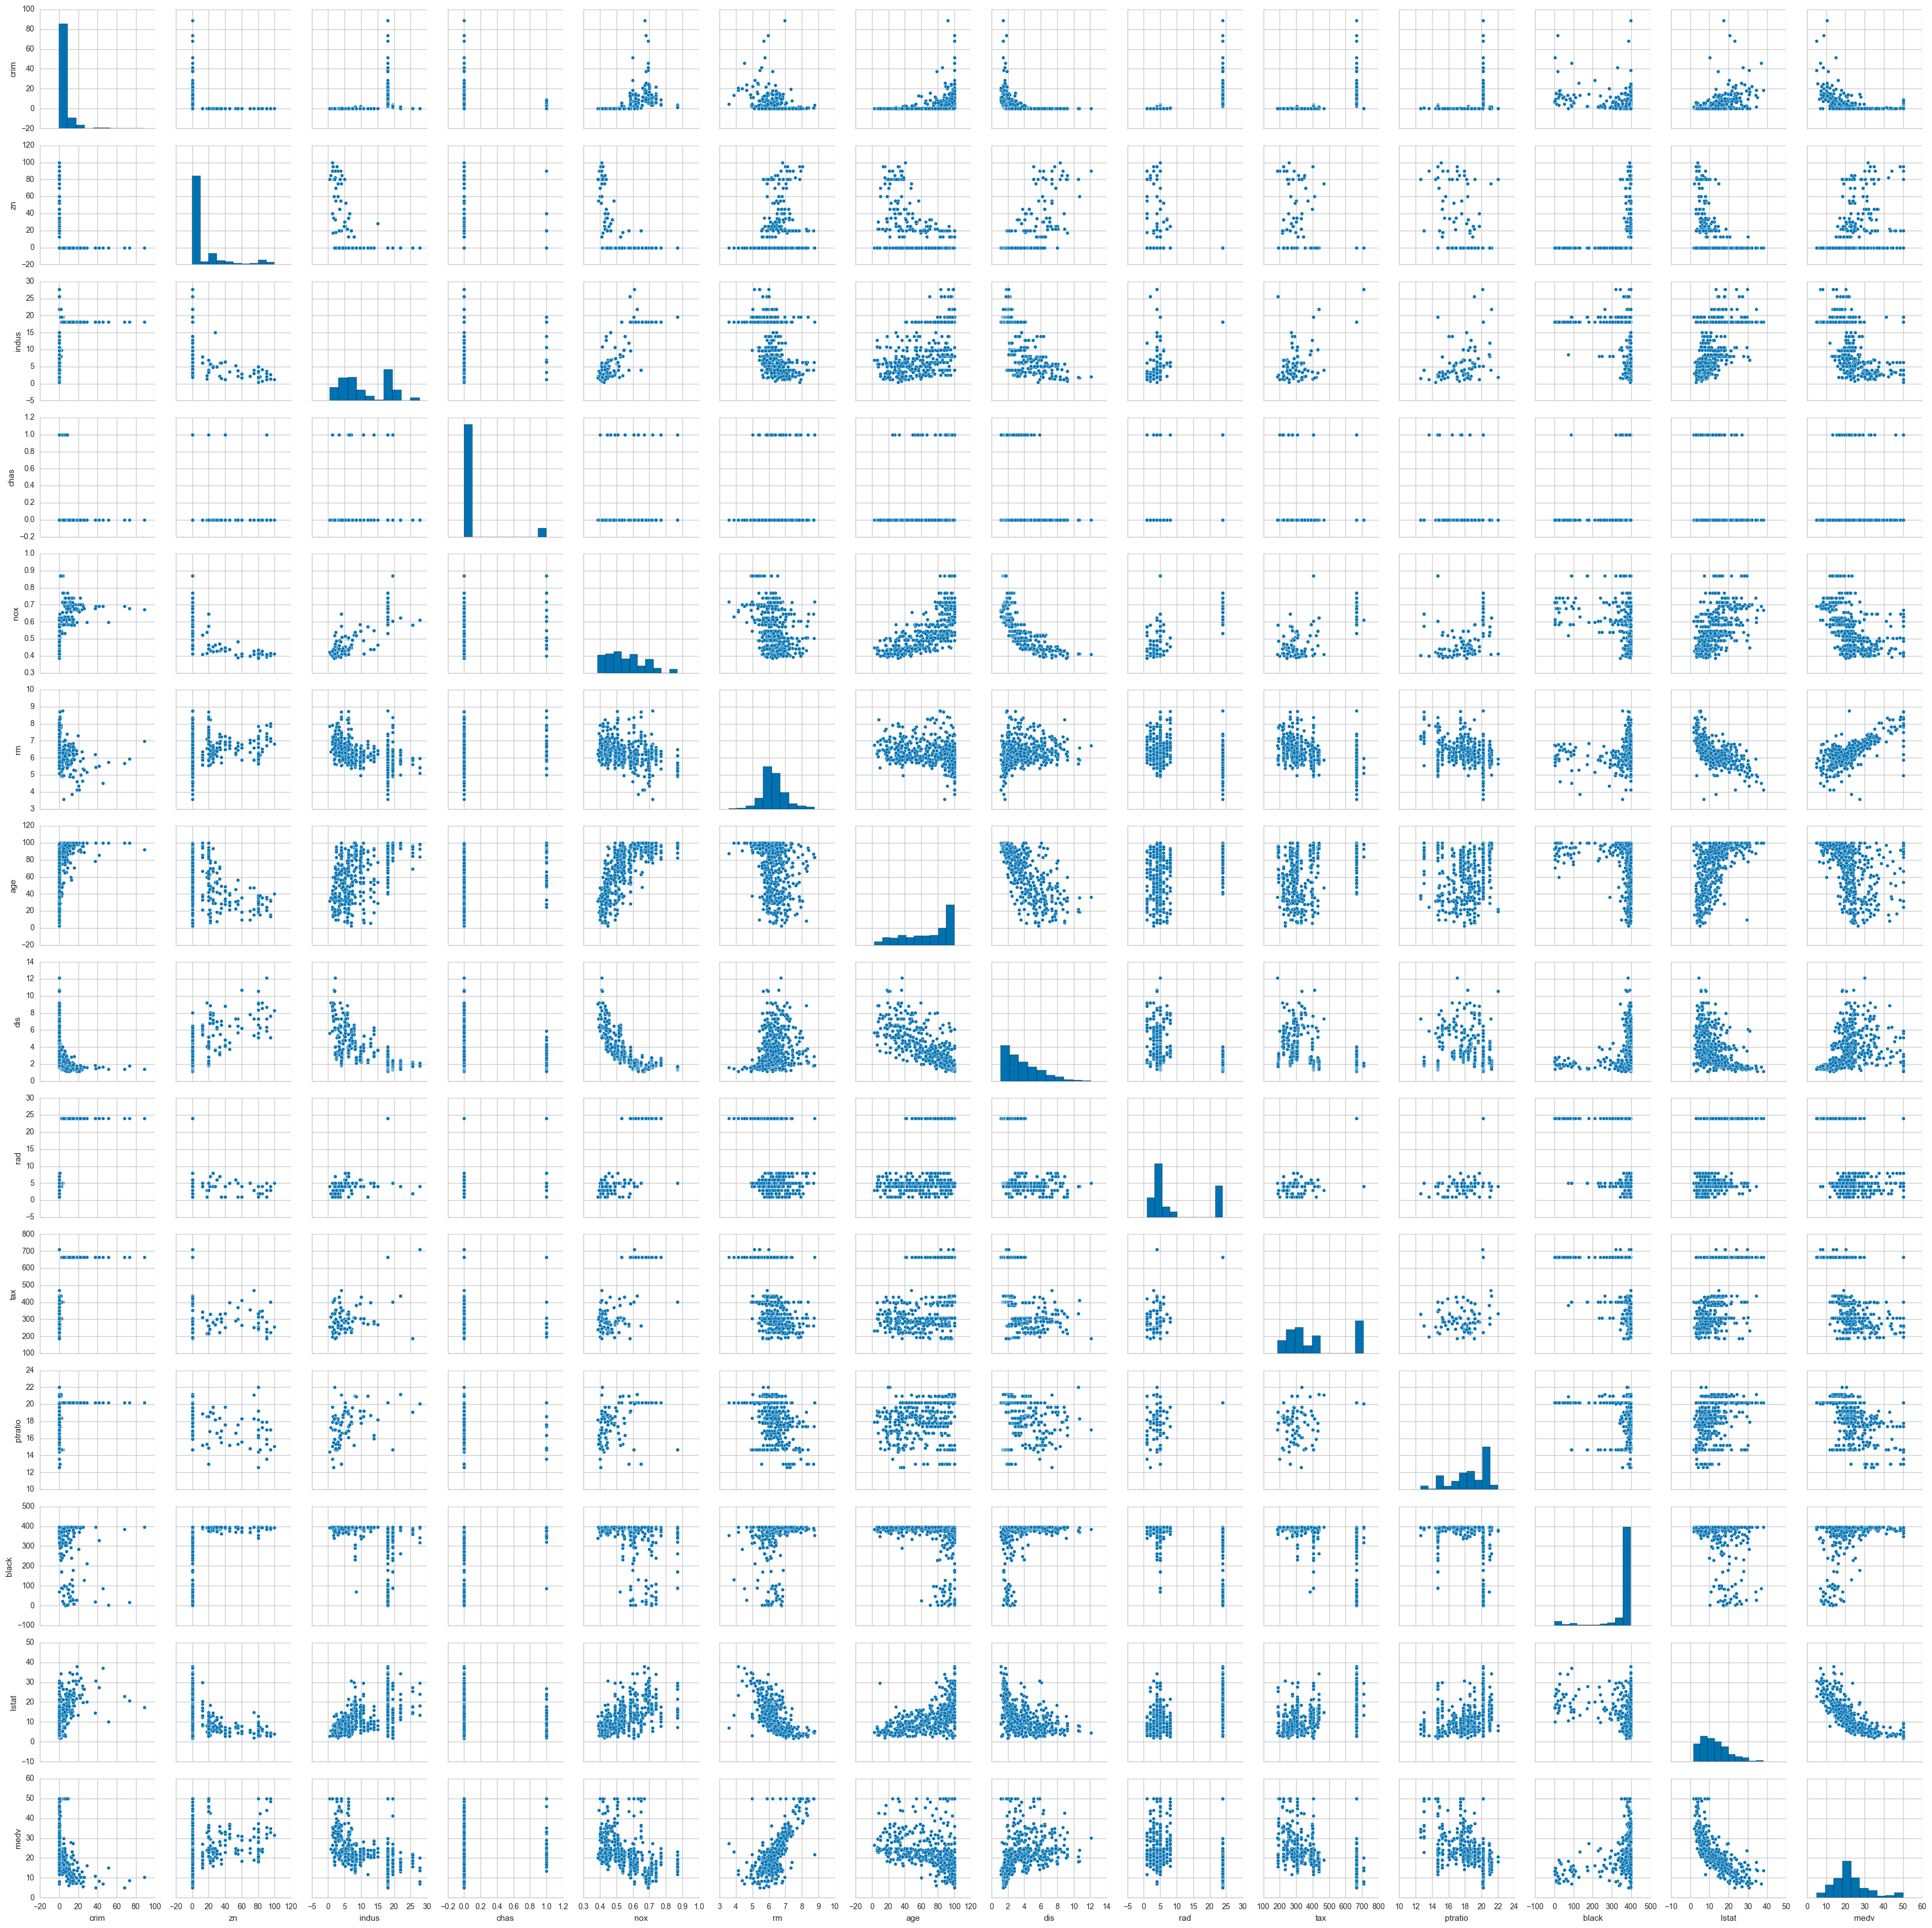

In [33]:
# (b)

sns.pairplot(boston_df)

# crim: age, dis, rad, tax, ptratio
# zn: indus, nox, age, lstat
# indus: age, dis
# nox: age, dis
# dis: lstat
# lstat: medv



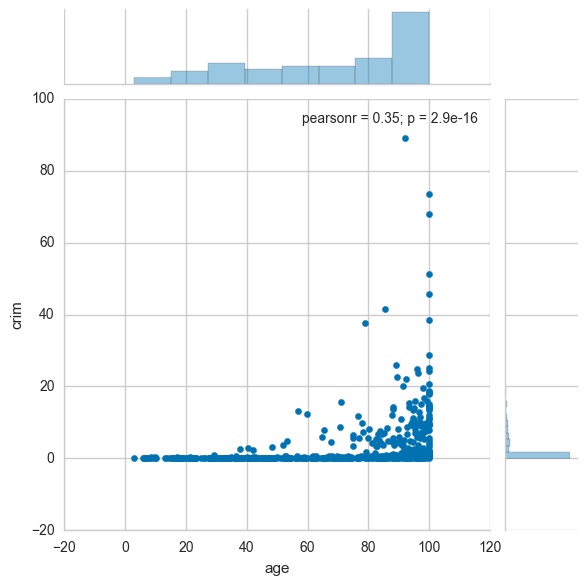

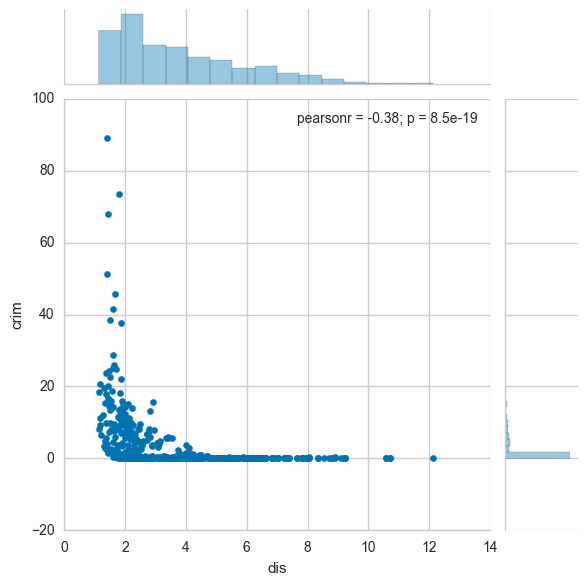

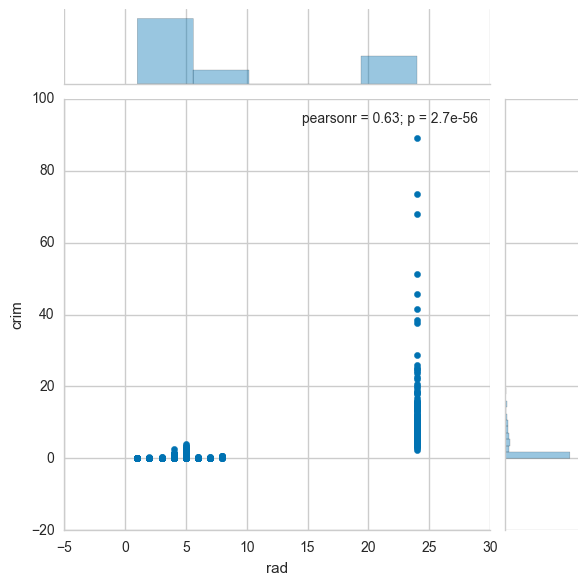

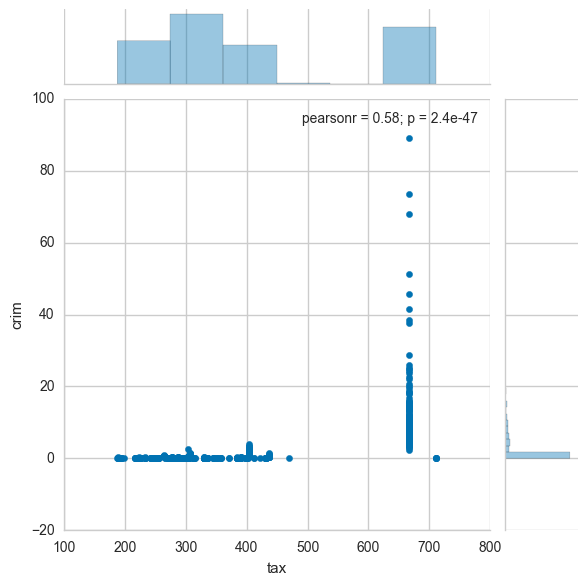

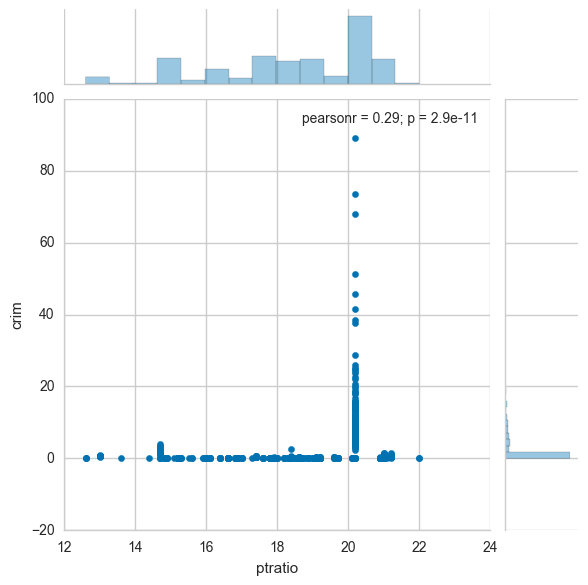

In [34]:
revelant_features = ["age","dis","rad","tax","ptratio"]
for feature in revelant_features:
    sns.jointplot(x=feature, y="crim", data=boston_df);
    
# Older homes, more crime
# Closer to work-area, more crime
# Higher index of accessibility to radial highways, more crime
# Higher tax rate, more crime
# Higher pupil:teacher ratio, more crime

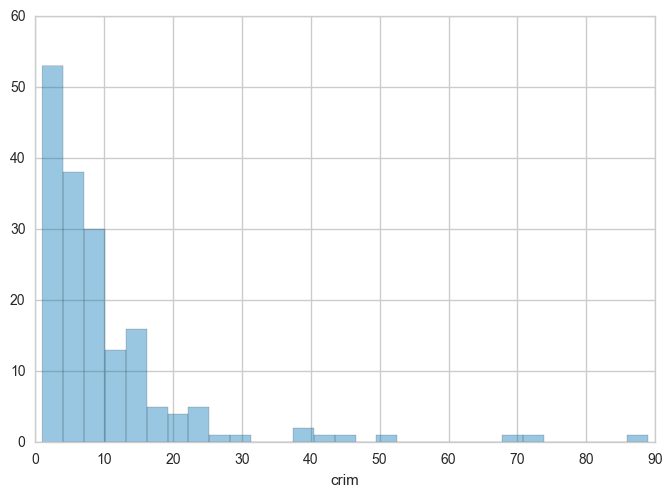

In [35]:
# remove the very low crime areas
sns.distplot(boston_df["crim"][boston_df["crim"]>1], kde=False)

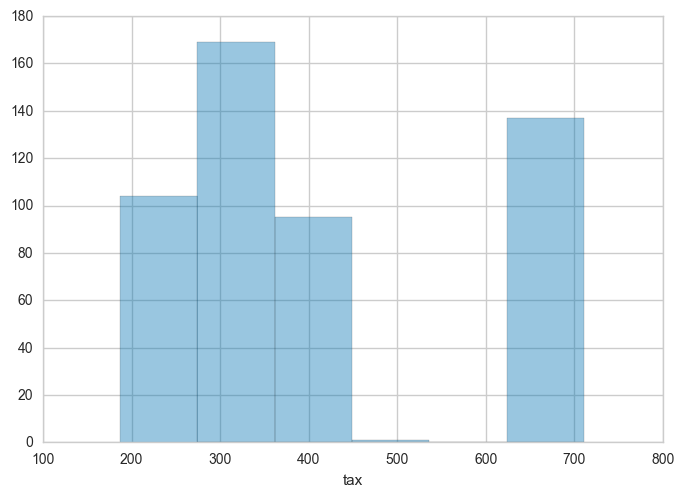

In [36]:
sns.distplot(boston_df["tax"], kde=False)
# there is a large divide between suburbs with low tax rates and a peak at 660-680


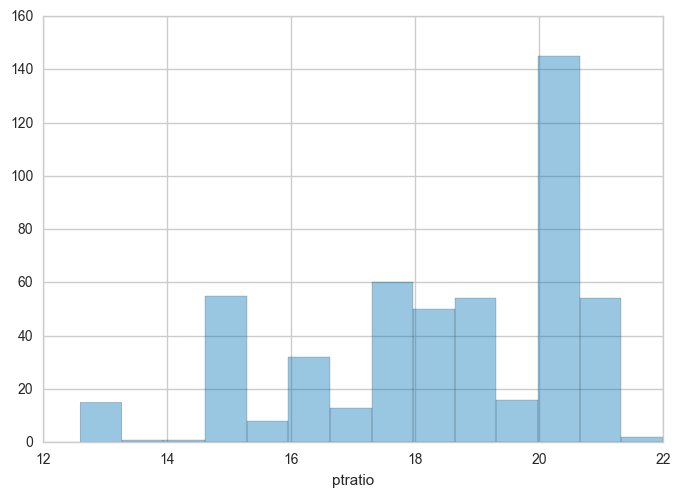

In [37]:
sns.distplot(boston_df["ptratio"], kde=False)
# a skew towards high ratios, but no particularly high ratios


In [38]:
# (e)
len(boston_df[1== boston_df["chas"]])
# 35 suburbs


35

In [39]:
np.median(boston_df["ptratio"])
# 19.05


19.050000000000001

In [40]:
boston_df[boston_df["medv"] == np.min(boston_df["medv"])]
# Not the best place to live, but certainly not the worst.

crim   zn  indus  chas    nox     rm    age     dis  rad    tax  \
399  38.3518  0.0   18.1     0  0.693  5.453  100.0  1.4896   24  666.0   
406  67.9208  0.0   18.1     0  0.693  5.683  100.0  1.4254   24  666.0   

     ptratio   black  lstat  medv  
399     20.2  396.90  30.59   5.0  
406     20.2  384.97  22.98   5.0

In [41]:
boston_df.describe()[1:]

crim          zn      indus      chas       nox        rm  \
mean   3.613524   11.363636  11.136779  0.069170  0.554695  6.284634   
std    8.601545   23.322453   6.860353  0.253994  0.115878  0.702617   
min    0.006320    0.000000   0.460000  0.000000  0.385000  3.561000   
25%    0.082045    0.000000   5.190000  0.000000  0.449000  5.885500   
50%    0.256510    0.000000   9.690000  0.000000  0.538000  6.208500   
75%    3.677083   12.500000  18.100000  0.000000  0.624000  6.623500   
max   88.976200  100.000000  27.740000  1.000000  0.871000  8.780000   

             age        dis        rad         tax    ptratio       black  \
mean   68.574901   3.795043   9.549407  408.237154  18.455534  356.674032   
std    28.148861   2.105710   8.707259  168.537116   2.164946   91.294864   
min     2.900000   1.129600   1.000000  187.000000  12.600000    0.320000   
25%    45.025000   2.100175   4.000000  279.000000  17.400000  375.377500   
50%    77.500000   3.207450   5.000000  330.000000  19.050000  391.440000   
75%    94.075000   5.188425  24.000000  666.000000  20.200000  396.225000   
max   100.000000  12.126500  24.000000  711.000000  22.000000  396.900000   

          lstat       medv  
mean  12.653063  22.532806  
std    7.141062   9.197104  
min    1.730000   5.000000  
25%    6.950000  17.025000  
50%   11.360000  21.200000  
75%   16.955000  25.000000  
max   37.970000  50.000000

In [42]:
# (h)
boston_df[boston_df["rm"]>7].describe()

crim         zn      indus       chas        nox         rm  \
count  64.000000  64.000000  64.000000  64.000000  64.000000  64.000000   
mean    0.979109  28.171875   5.775625   0.125000   0.504455   7.570094   
std     2.807599  34.053089   5.544494   0.333333   0.092863   0.481467   
min     0.009060   0.000000   0.460000   0.000000   0.394000   7.007000   
25%     0.045023   0.000000   2.460000   0.000000   0.430250   7.183250   
50%     0.097860  20.000000   3.970000   0.000000   0.488000   7.414000   
75%     0.542893  45.000000   6.200000   0.000000   0.582500   7.858500   
max    19.609100  95.000000  19.580000   1.000000   0.718000   8.780000   

              age        dis        rad         tax    ptratio       black  \
count   64.000000  64.000000  64.000000   64.000000  64.000000   64.000000   
mean    60.640625   4.199617   5.984375  312.234375  16.259375  388.275156   
std     27.858587   2.074423   5.655429  118.311365   2.351407    9.487005   
min      8.400000   1.202400   1.000000  193.000000  12.600000  354.310000   
25%     36.000000   2.444925   3.000000  244.750000  14.700000  384.922500   
50%     63.800000   3.495200   5.000000  273.000000  17.400000  390.660000   
75%     85.025000   5.462925   7.000000  329.000000  17.925000  395.305000   
max    100.000000   9.222900  24.000000  666.000000  20.200000  396.900000   

           lstat       medv  
count  64.000000  64.000000  
mean    5.474062  38.396875  
std     2.906582   8.722639  
min     1.730000  15.000000  
25%     3.555000  32.975000  
50%     4.775000  36.450000  
75%     6.590000  46.175000  
max    16.740000  50.000000

In [43]:
boston_df[boston_df["rm"]>8].describe()

crim         zn      indus       chas        nox         rm  \
count  13.000000  13.000000  13.000000  13.000000  13.000000  13.000000   
mean    0.718795  13.615385   7.078462   0.153846   0.539238   8.348538   
std     0.901640  26.298094   5.392767   0.375534   0.092352   0.251261   
min     0.020090   0.000000   2.680000   0.000000   0.416100   8.034000   
25%     0.331470   0.000000   3.970000   0.000000   0.504000   8.247000   
50%     0.520140   0.000000   6.200000   0.000000   0.507000   8.297000   
75%     0.578340  20.000000   6.200000   0.000000   0.605000   8.398000   
max     3.474280  95.000000  19.580000   1.000000   0.718000   8.780000   

             age        dis        rad         tax    ptratio       black  \
count  13.000000  13.000000  13.000000   13.000000  13.000000   13.000000   
mean   71.538462   3.430192   7.461538  325.076923  16.361538  385.210769   
std    24.608723   1.883955   5.332532  110.971063   2.410580   10.529359   
min     8.400000   1.801000   2.000000  224.000000  13.000000  354.550000   
25%    70.400000   2.288500   5.000000  264.000000  14.700000  384.540000   
50%    78.300000   2.894400   7.000000  307.000000  17.400000  386.860000   
75%    86.500000   3.651900   8.000000  307.000000  17.400000  389.700000   
max    93.900000   8.906700  24.000000  666.000000  20.200000  396.900000   

           lstat       medv  
count  13.000000  13.000000  
mean    4.310000  44.200000  
std     1.373566   8.092383  
min     2.470000  21.900000  
25%     3.320000  41.700000  
50%     4.140000  48.300000  
75%     5.120000  50.000000  
max     7.440000  50.000000